# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This dataset contains information about movies released from year 1960 to year 2015.
Our goal is to see the relationship between the popularity of movies in 2015 with other variables like vote average, budget and revenue.

In [375]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

## Data Wrangling

### General Properties

In [376]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It is clear here that there are missing values in columns; imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.

In [378]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [379]:
sum(df.duplicated())

1

The duplicated rows need to be dropped.

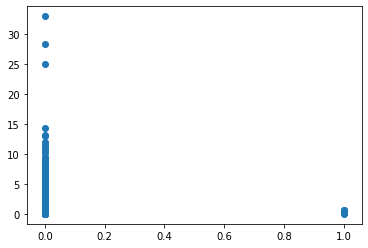

In [380]:
plt.pyplot.scatter(x=df.imdb_id.isnull(), y=df.popularity)

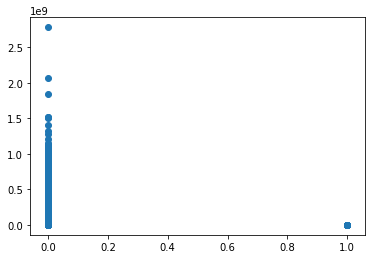

In [381]:
plt.pyplot.scatter(x=df.imdb_id.isnull(), y=df.revenue)

The two plots above show that that null-valued imdb_id don't have high popularity nor high revenue. Therefore, the rows with null imdb_id value can be dropped.

### Data Cleaning 
#### Duplicated rows wil be removed. 
#### Release_date data type will be changed to datetime. 
#### Any unnecessary columns will be dropped. 
#### In case of having missing values, if the number of missing values in a feature is small , the row will be dropped, otherwise, missing values will be filled with mean values if numeric or with mode if not.

In [382]:
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [383]:
df.drop(df[df.imdb_id.isnull()].index, inplace=True)

Columns homepage, keywords, tagline don't seem to contribute to the popularity nor to the revenue of the movies.
So, these columns can be dropped.

In [384]:
df.drop(labels=['homepage', 'keywords', 'tagline'], axis=1, inplace=True)

Since only few rows have null cast, director, overview and genre, these rows can be dropped.

In [385]:
df.drop(df[df.overview.isnull()].index, inplace=True)
df.drop(df[df.genres.isnull()].index, inplace=True)
df.drop(df[df.cast.isnull()].index, inplace=True)
df.drop(df[df.director.isnull()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 18 columns):
id                      10725 non-null int64
imdb_id                 10725 non-null object
popularity              10725 non-null float64
budget                  10725 non-null int64
revenue                 10725 non-null int64
original_title          10725 non-null object
cast                    10725 non-null object
director                10725 non-null object
overview                10725 non-null object
runtime                 10725 non-null int64
genres                  10725 non-null object
production_companies    9771 non-null object
release_date            10725 non-null object
vote_count              10725 non-null int64
vote_average            10725 non-null float64
release_year            10725 non-null int64
budget_adj              10725 non-null float64
revenue_adj             10725 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.6+ MB


Now, we will convert the data type of release_date from string to date time.

In [386]:
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 18 columns):
id                      10725 non-null int64
imdb_id                 10725 non-null object
popularity              10725 non-null float64
budget                  10725 non-null int64
revenue                 10725 non-null int64
original_title          10725 non-null object
cast                    10725 non-null object
director                10725 non-null object
overview                10725 non-null object
runtime                 10725 non-null int64
genres                  10725 non-null object
production_companies    9771 non-null object
release_date            10725 non-null datetime64[ns]
vote_count              10725 non-null int64
vote_average            10725 non-null float64
release_year            10725 non-null int64
budget_adj              10725 non-null float64
revenue_adj             10725 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(7)

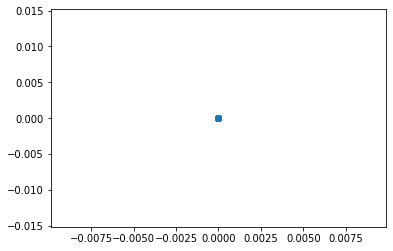

In [387]:
# Ensuring rows with missing revenue are the same rows that have missing revenue_adj
plt.pyplot.scatter(x=df.query('revenue_adj == 0').revenue_adj, y=df.query('revenue == 0').revenue)

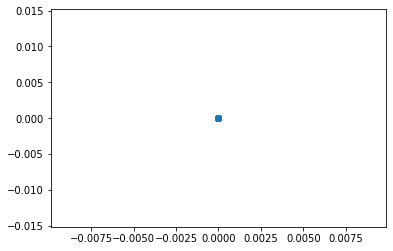

In [388]:
# Ensuring rows with missing budget are the same rows that have missing budget_adj
plt.pyplot.scatter(x=df.query('budget == 0').budget, y=df.query('budget_adj == 0').budget_adj)

It is clear here that all rows with budget equals zero have budget_adj equals to zero as well, and all rows with revenue equals zero have revenue_adj equals to zero too. So the next step will be replacing those zero values with the mean value of the same year and rating for each column. 

In [389]:
mean_budget = dict(df.query('budget > 0').groupby(['release_year', 'vote_average']).budget.mean())
mean_budget_adj = dict(df.query('budget_adj > 0').groupby(['release_year', 'vote_average']).budget_adj.mean())
mean_revenue = dict(df.query('revenue > 0').groupby(['release_year', 'vote_average']).revenue.mean())
mean_revenue_adj = dict(df.query('revenue_adj > 0').groupby(['release_year', 'vote_average']).revenue_adj.mean())

df.budget = df.budget.apply(lambda x : mean_budget[(df.loc[x].release_year, df.loc[x].vote_average)] if x == 0 else x)
df.budget_adj = df.budget_adj.apply(lambda x : mean_budget_adj[(df.loc[x].release_year, df.loc[x].vote_average)] if x == 0 else x)
df.revenue = df.revenue.apply(lambda x : mean_revenue[(df.loc[x].release_year, df.loc[x].vote_average)] if x == 0 else x)
df.revenue_adj = df.revenue_adj.apply(lambda x : mean_revenue_adj[(df.loc[x].release_year, df.loc[x].vote_average)] if x == 0 else x)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,68525000.0,5.668943e+08,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,6.304297e+07,5.215425e+08
10862,20379,tt0060472,0.065543,68525000.0,5.668943e+08,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,6.304297e+07,5.215425e+08
10863,39768,tt0060161,0.065141,68525000.0,5.668943e+08,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,6.304297e+07,5.215425e+08
10864,21449,tt0061177,0.064317,68525000.0,5.668943e+08,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,6.304297e+07,5.215425e+08


Now, we will drop the missing values for the production_companies column.

In [390]:
# we will drop rows with missing production_companies values
df.production_companies.dropna(inplace=True)

In [391]:
sum(df.production_companies.isnull())

0

We will make the cast and genre columns contain only the first name to simplify our analysis.

In [392]:
genre = pd.DataFrame(df.genres.apply(lambda x: x if x.find('|') == -1 else x.split('|')[0]))
df.drop('genres', axis=1, inplace=True)
df.insert(10, 'genres', genre.genres)

casts = pd.DataFrame(df.cast.apply(lambda x: x if x.find('|') == -1 else x.split('|')[0]))
df.drop('cast', axis=1, inplace=True)
df.insert(10, 'cast', casts.cast)
df

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,cast,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Chris Pratt,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Tom Hardy,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure,Shailene Woodley,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,Harrison Ford,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Vin Diesel,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,68525000.0,5.668943e+08,The Endless Summer,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Michael Hynson,Bruce Brown Films,2066-06-15,11,7.4,1966,6.304297e+07,5.215425e+08
10862,20379,tt0060472,0.065543,68525000.0,5.668943e+08,Grand Prix,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action,James Garner,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,6.304297e+07,5.215425e+08
10863,39768,tt0060161,0.065141,68525000.0,5.668943e+08,Beregis Avtomobilya,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery,Innokentiy Smoktunovskiy,Mosfilm,2066-01-01,11,6.5,1966,6.304297e+07,5.215425e+08
10864,21449,tt0061177,0.064317,68525000.0,5.668943e+08,"What's Up, Tiger Lily?",Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action,Tatsuya Mihashi,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,6.304297e+07,5.215425e+08


In [393]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10725.000000,10725.000000,1.072500e+04,1.072500e+04,10725.000000,10725.000000,10725.000000,10725.000000,1.072500e+04,1.072500e+04
mean,65182.327925,0.652852,5.041578e+07,3.511962e+08,102.502471,219.933054,5.964317,2001.255012,5.053099e+07,3.380206e+08
std,91470.421976,1.005025,3.290476e+07,2.614650e+08,30.458857,578.955633,0.930166,12.822147,3.187324e+07,2.424159e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10546.000000,0.210766,1.900000e+07,4.010554e+07,90.000000,17.000000,5.400000,1995.000000,2.424523e+07,5.706803e+07
50%,20309.000000,0.387304,6.852500e+07,5.668943e+08,99.000000,39.000000,6.000000,2006.000000,6.304297e+07,5.215425e+08
75%,73937.000000,0.721548,6.852500e+07,5.668943e+08,112.000000,148.000000,6.600000,2011.000000,6.304297e+07,5.215425e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Exploratory Data Analysis

### Production company that produced most movies each year

<BarContainer object of 56 artists>

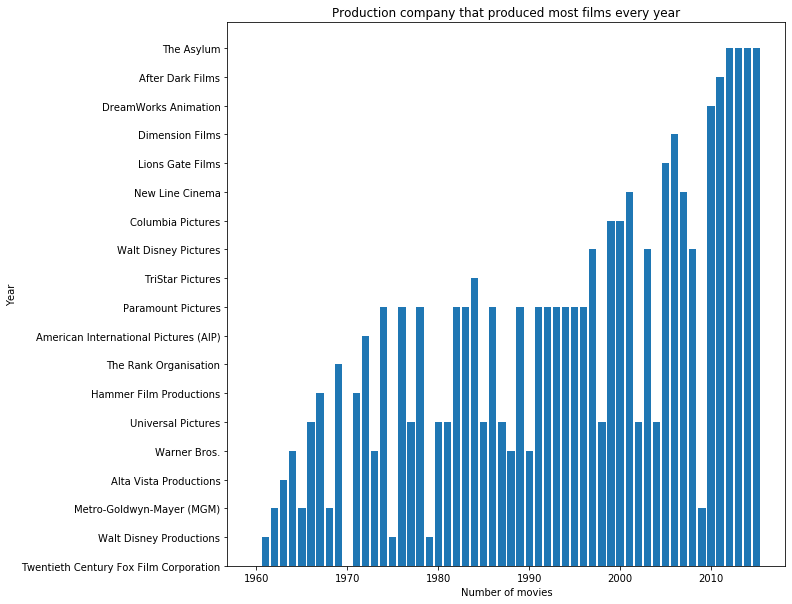

In [394]:
plt.pyplot.figure(figsize=(10, 10))
plt.pyplot.title('Production company that produced most films every year')
plt.pyplot.xlabel('Number of movies')
plt.pyplot.ylabel('Year')
plt.pyplot.bar(mode_production_companies.keys(), mode_production_companies.values())

Here is a bar chart that shows the name of the company that produced most movies each year.

### Most popular genres in each year

In [395]:
year_genre = pd.DataFrame(df.groupby(['release_year']).popularity.idxmax())

y_g = pd.DataFrame(year_genre.popularity.apply(lambda x: df.loc[x]))
y_g.drop(['id', 'popularity', 'imdb_id', 'budget', 'director', 'overview', 'runtime', 'original_title', 'cast', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

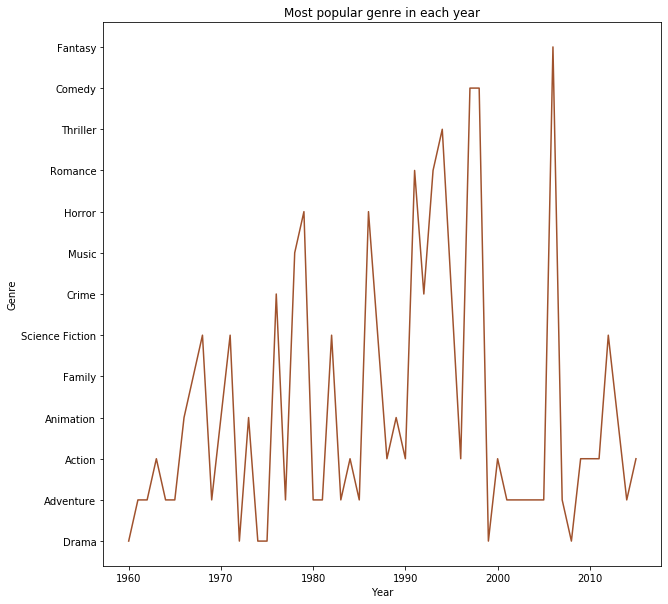

In [396]:
plt.pyplot.figure(figsize=(10, 10))
plt.pyplot.title('Most popular genre in each year')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Genre')
plt.pyplot.plot(y_g.release_year, y_g.genres, color='sienna')

Most popular genre changes from year to year.

### Movies with highest revenues in each year

In [397]:
mov_rev = pd.DataFrame(df.groupby(['release_year']).revenue.idxmax())

movie_title = pd.DataFrame(mov_rev.revenue.apply(lambda x: df.loc[x]))
movie_title.drop(['id', 'popularity', 'imdb_id', 'budget', 'director', 'overview', 'runtime', 'genres', 'cast', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

<BarContainer object of 56 artists>

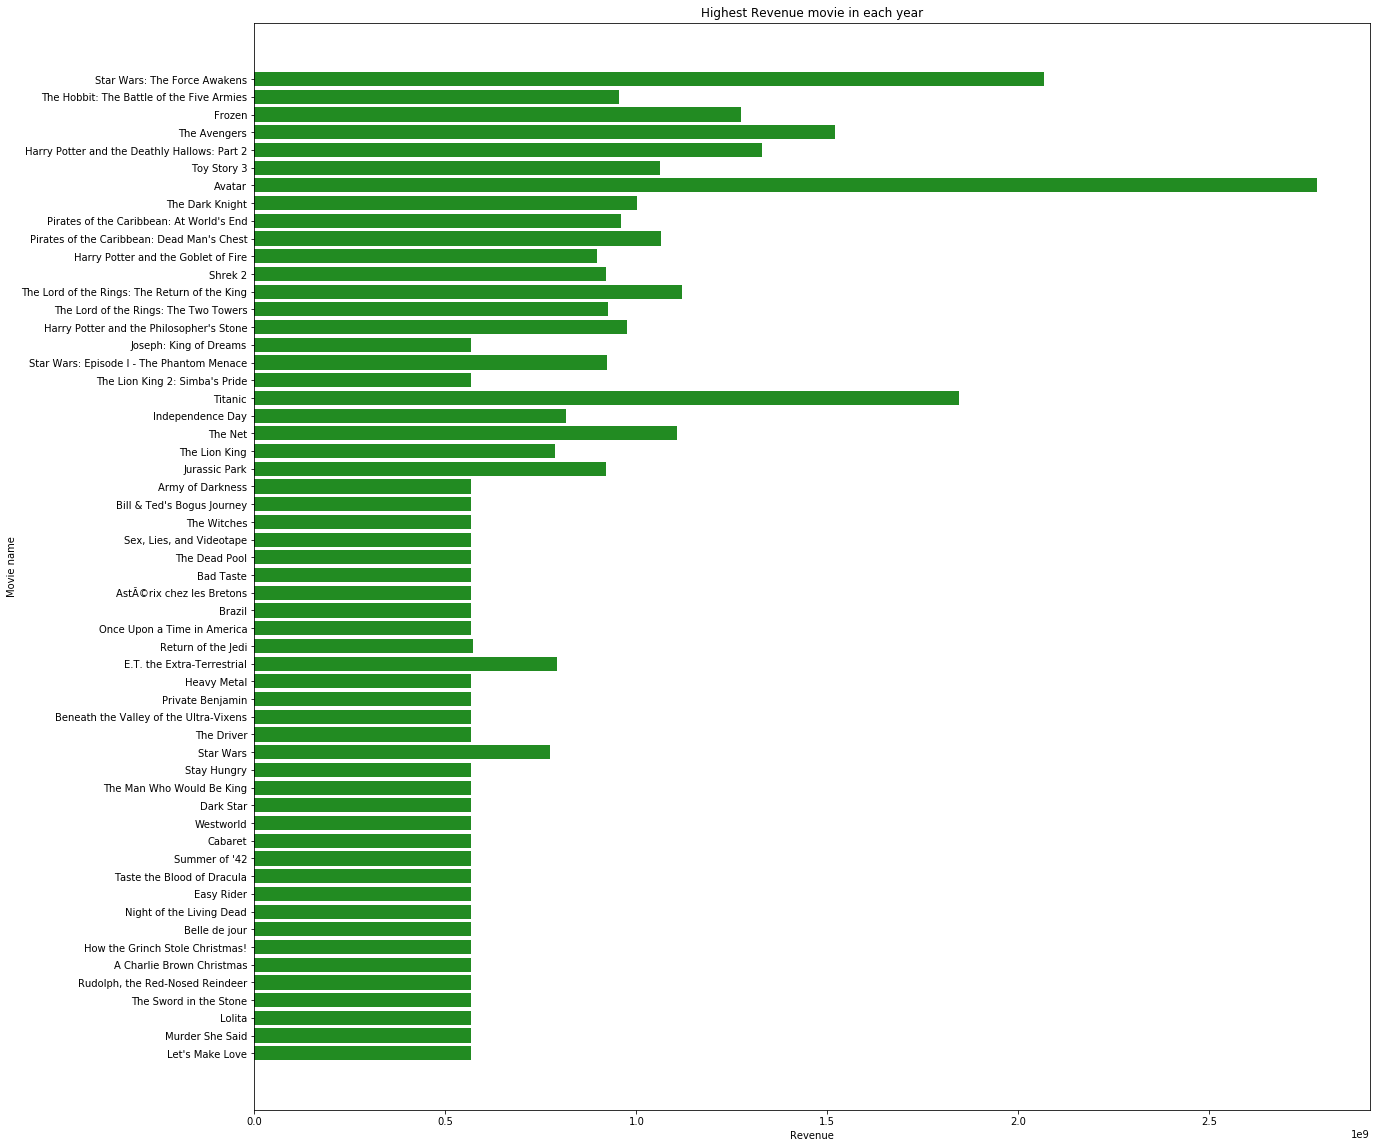

In [398]:
plt.pyplot.figure(figsize=(20, 20))
plt.pyplot.title('Highest Revenue movie in each year')
plt.pyplot.xlabel('Revenue')
plt.pyplot.ylabel('Movie name')
plt.pyplot.barh(movie_title.original_title, movie_title.revenue, color='forestgreen')

This plot shows the highest revenue movie in each year

## We will make our analysis on year 2015

### Most popular genre in 2015

In [399]:
df_2015 = df.query('release_year == 2015')

<BarContainer object of 617 artists>

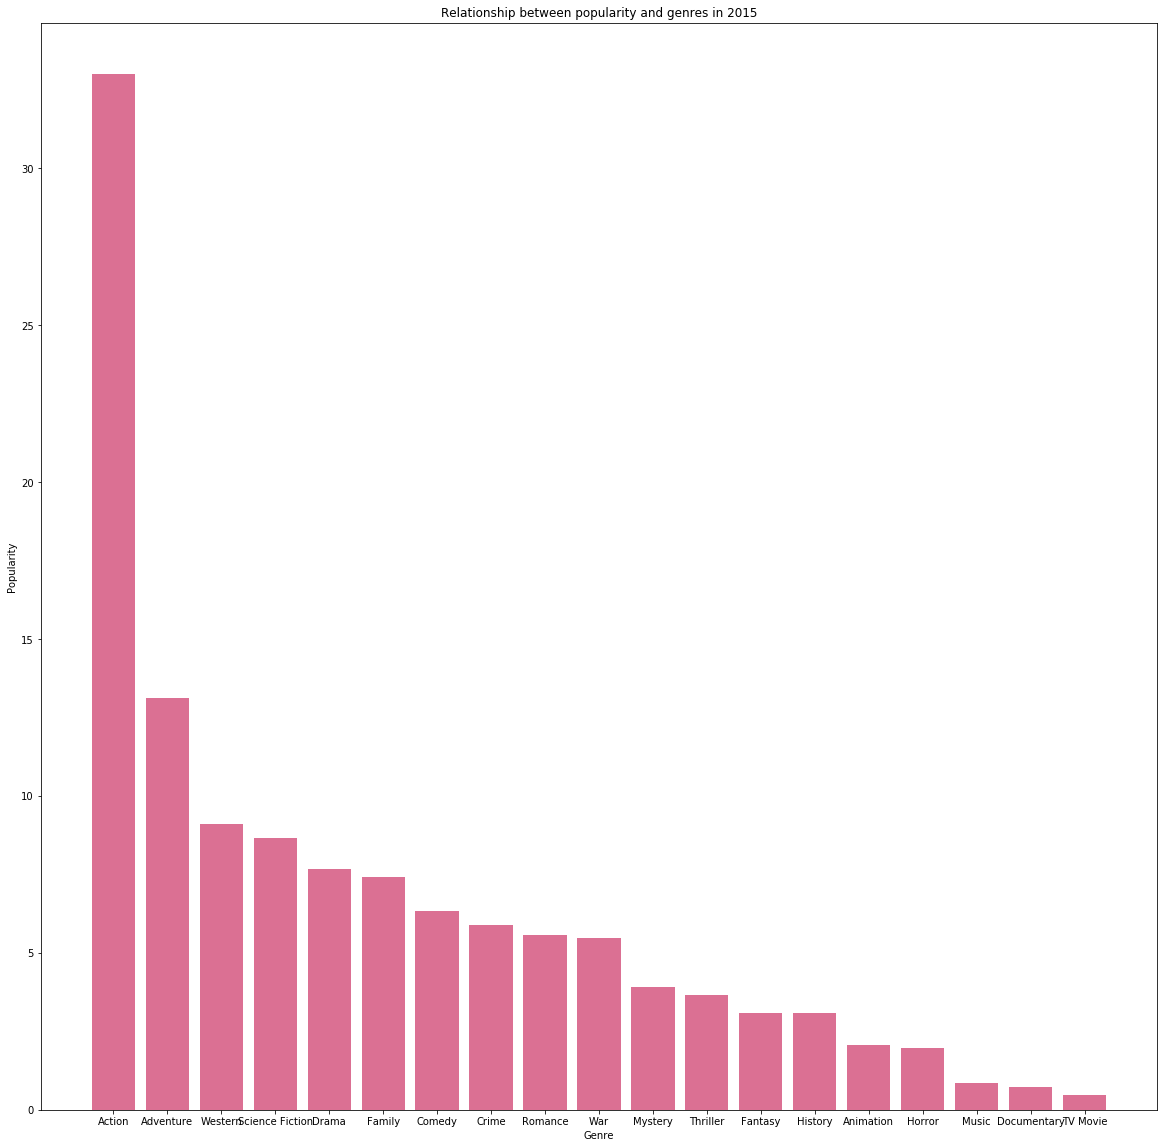

In [400]:
plt.pyplot.figure(figsize=(20, 20))
plt.pyplot.title('Relationship between popularity and genres in 2015')
plt.pyplot.xlabel('Genre')
plt.pyplot.ylabel('Popularity')
plt.pyplot.bar(df_2015.genres, df_2015.popularity, color='palevioletred')

Action movies are the most popular in 2015.

### Most popular movie and actor in 2015

We will use onlt the most popular 25% to make our analysis more clear.

In [401]:
df_2015.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,617.000000,617.000000,6.170000e+02,6.170000e+02,617.000000,617.000000,617.000000,617.0,6.170000e+02,6.170000e+02
mean,296125.525122,1.047620,5.751414e+07,4.118105e+08,96.760130,295.225284,5.859319,2015.0,5.291298e+07,3.788655e+08
std,58762.580681,2.252220,3.257038e+07,2.643741e+08,25.603828,708.403246,1.071660,0.0,2.996474e+07,2.432240e+08
min,10317.000000,0.003920,1.000000e+01,4.444000e+03,0.000000,10.000000,2.400000,2015.0,9.199996e+00,4.088478e+03
25%,269033.000000,0.208491,4.000000e+07,9.382076e+07,88.000000,18.000000,5.200000,2015.0,3.679998e+07,8.631506e+07
50%,309304.000000,0.404363,6.852500e+07,5.668943e+08,95.000000,47.000000,5.900000,2015.0,6.304297e+07,5.215425e+08
75%,333674.000000,1.008474,6.852500e+07,5.668943e+08,108.000000,199.000000,6.600000,2015.0,6.304297e+07,5.215425e+08
max,395883.000000,32.985763,2.800000e+08,2.068178e+09,300.000000,6185.000000,8.400000,2015.0,2.575999e+08,1.902723e+09


In [402]:
df_2015_up = df_2015.query('popularity > 1.008474')

<BarContainer object of 154 artists>

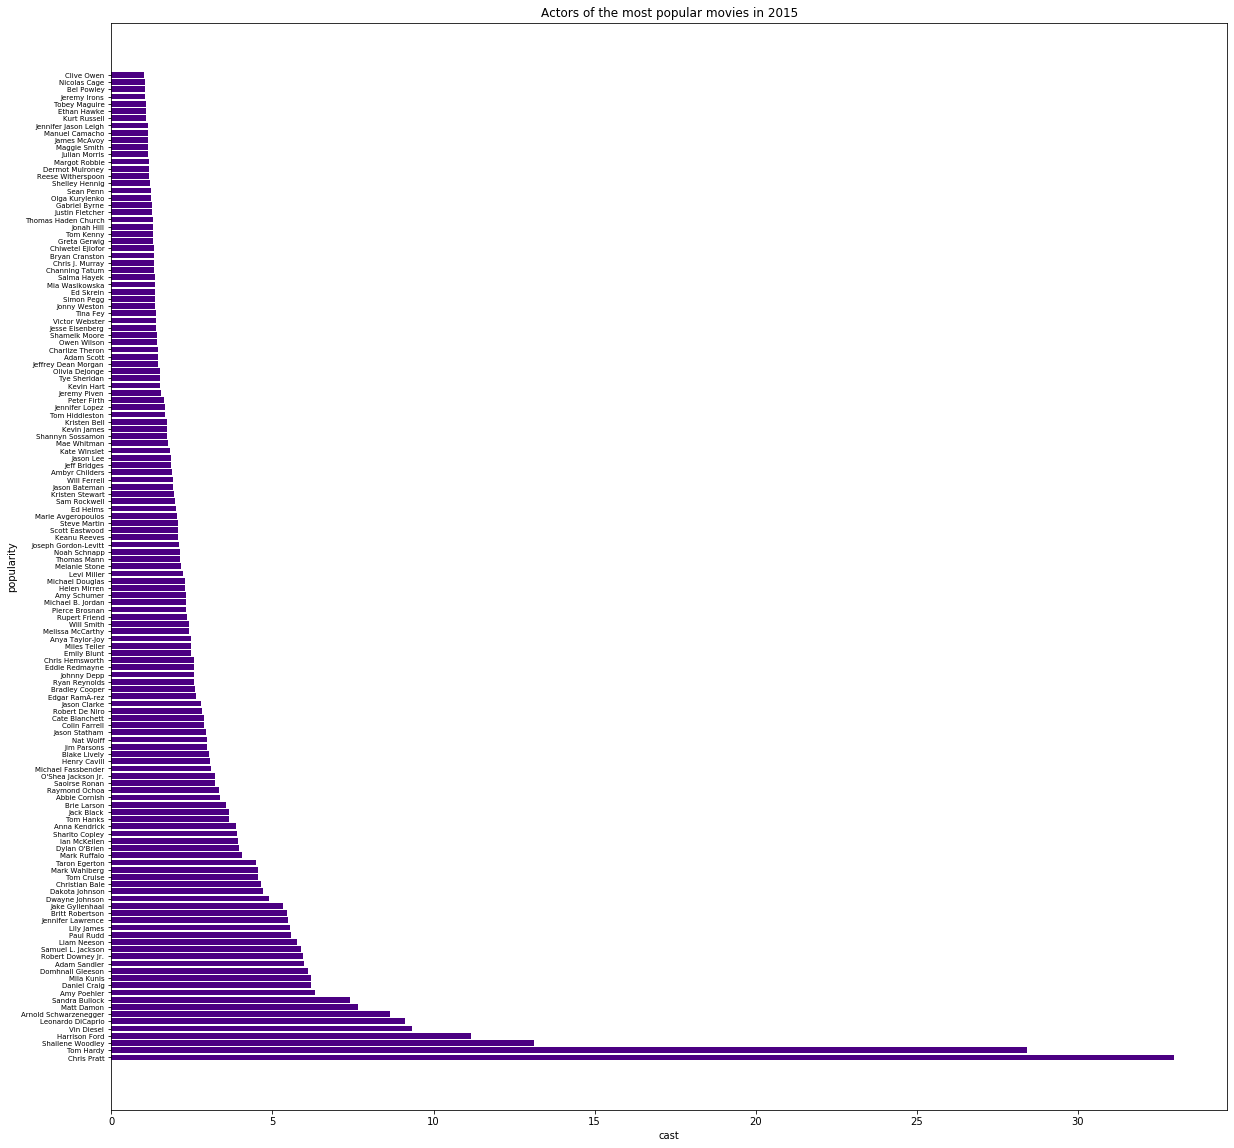

In [403]:
plt.pyplot.figure(figsize=(20, 20))
plt.pyplot.tick_params(axis='y', labelsize=7)
plt.pyplot.title('Actors of the most popular movies in 2015')
plt.pyplot.xlabel('cast')
plt.pyplot.ylabel('popularity')
plt.pyplot.barh(df_2015_up.cast, df_2015_up.popularity, color='indigo')

<BarContainer object of 154 artists>

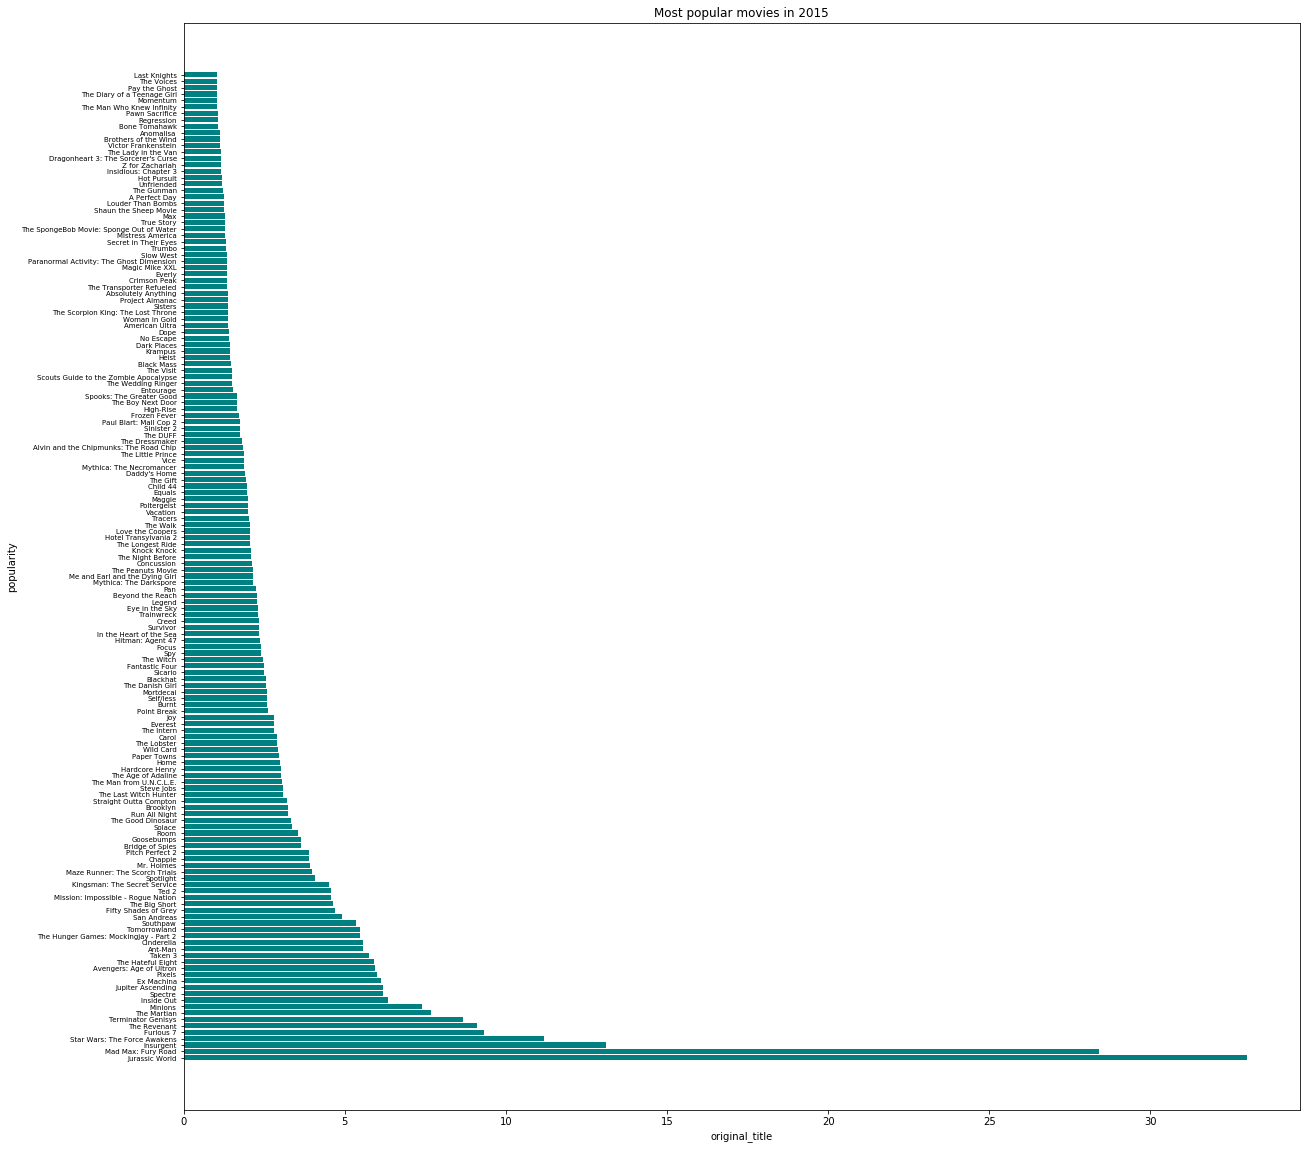

In [404]:
plt.pyplot.figure(figsize=(20, 20))
plt.pyplot.tick_params(axis='y', labelsize=7)
plt.pyplot.title('Most popular movies in 2015')
plt.pyplot.xlabel('original_title')
plt.pyplot.ylabel('popularity')
plt.pyplot.barh(df_2015_up.original_title, df_2015_up.popularity, color='teal')

Most popular movie in 2015 was Jurassic Word by Chris Pratt.

### Relationship between vote_average and popularity

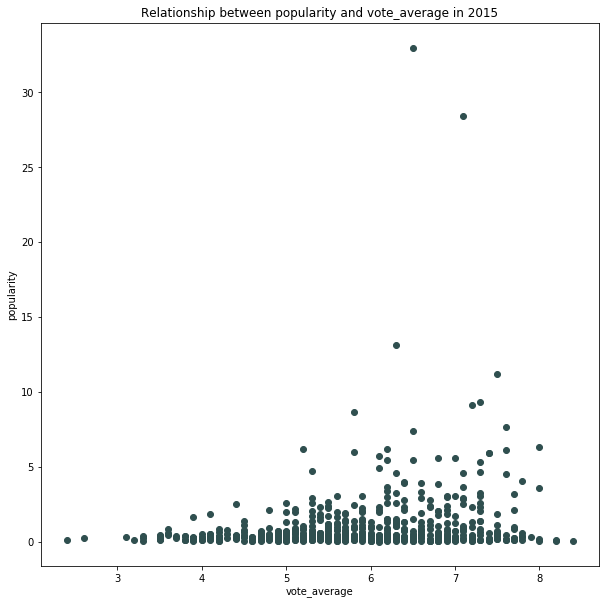

In [405]:
plt.pyplot.figure(figsize=(10, 10))
plt.pyplot.tick_params(axis='x', labelsize=10)
plt.pyplot.title('Relationship between popularity and vote_average in 2015')
plt.pyplot.xlabel('vote_average')
plt.pyplot.ylabel('popularity')
plt.pyplot.scatter(df_2015.vote_average, df_2015.popularity, color='darkslategray')

As shown here, vote_average increases as the popularity increases in most cases.

### Relationship between popularity and budget

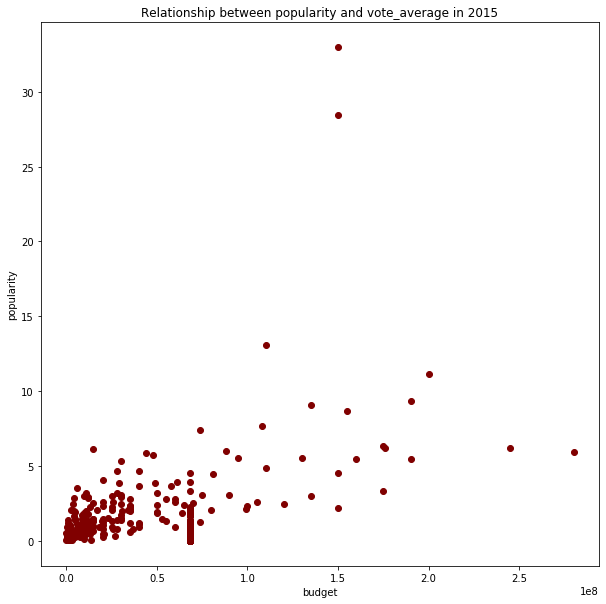

In [406]:
plt.pyplot.figure(figsize=(10, 10))
plt.pyplot.title('Relationship between popularity and vote_average in 2015')
plt.pyplot.xlabel('budget')
plt.pyplot.ylabel('popularity')
plt.pyplot.scatter(df_2015.budget, df_2015.popularity, color='maroon')

Generally, popularity increases as the bugdet increases, but most popular movies are the ones with highest budget.

### Relationship between popularity and revenue

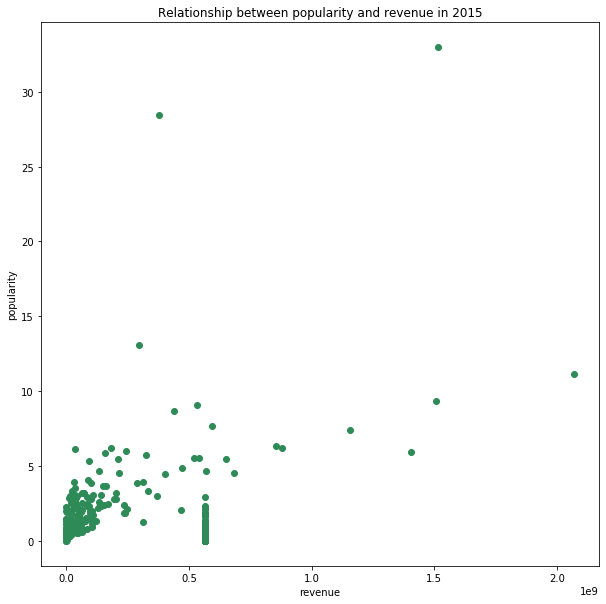

In [407]:
plt.pyplot.figure(figsize=(10, 10))
plt.pyplot.title('Relationship between popularity and revenue in 2015')
plt.pyplot.xlabel('revenue')
plt.pyplot.ylabel('popularity')
plt.pyplot.scatter(df_2015.revenue, df_2015.popularity, color='seagreen')

Popularity gets higher as the revenue gets higher.


## Conclusions

The popularity of a movie increases when the vote average, budget and revenue increase, also the action genre was the most popular in year 2015.

It is clear that the most popular genre changes every year.

The revenues of the movies increased in the recent years.

## Submitting your Project 

In [408]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0